#### State Schema With DataClasses

- When we define a langGraph StateGraph, we use a state schema
- The State Schema represents the structure and types of data our graph will use
- All Nodes re expected to communicate with that schema
- langGraph offers flexibility in how you define your state schema, accomodating various Python types and validation approaches!!

#### We can use the TypedDict class from python's typing module.
#### It Allows you to specify keys ans their corresponding value types/
#### But, not that these are typehints
#### They can be used by static type checkers (like mypy) or IDEs to catch potential type-related error before the code is run
#### But They are not enforced at runtime

In [43]:
from typing_extensions import TypedDict
from typing import Literal

class TypeDictState(TypedDict):
    name: str
    game: Literal["cricket", "football", "badminton"]

    

In [69]:
## Node Function

def play_game(state:TypeDictState):
    print("Play_game node has been called...")
    return {"name": state["name"]}


def play_cricket(state:TypeDictState):
    print("Play_cricket node has been called...")
    return {"name": state["name"],"game": "cricket"}

def play_football(state:TypeDictState):
    print("Play_football node has been called...")
    return {"name": state["name"],"game": "football"}

def play_badminton(state:TypeDictState):
    print("Play_badminton node has been called...")
    return {"name": state["name"],"game": "badminton"}



In [75]:
def decide_play(state:TypeDictState) -> Literal["play_cricket","play_football","play_badminton"]:
    if random.random() < 0.33:
        return "play_cricket"
    elif random.random() < 0.66:
        return "play_football"
    else:
        return "play_badminton"

In [76]:
import random
from IPython.display import display, Image
from langgraph.graph import StateGraph,START,END

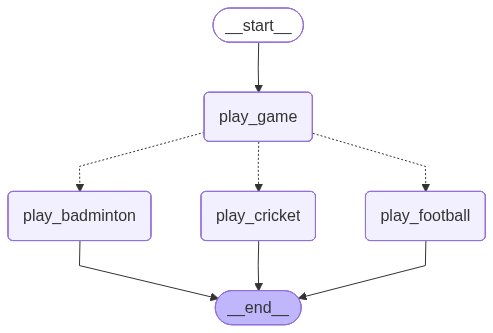

In [77]:
builder=StateGraph(TypeDictState)
builder.add_node("play_game",play_game)
builder.add_node("play_cricket",play_cricket)
builder.add_node("play_football",play_football)
builder.add_node("play_badminton",play_badminton)  


### Flow of the graph
builder.add_edge(START,"play_game")
builder.add_conditional_edges("play_game",decide_play)
builder.add_edge("play_cricket",END)
builder.add_edge("play_football",END)
builder.add_edge("play_badminton",END)


graph_builder=builder.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [78]:
graph_builder.invoke({"name": "Shivaji"})

Play_game node has been called...
Play_badminton node has been called...


{'name': 'Shivaji', 'game': 'badminton'}

In [ ]:
graph_builder.invoke({"name": 123})

# This is the disadvantage of using TypeDict as the state schema. It does not perform any runtime type checking. 
# Same for DataClass as well. We will see how to add runtime type checking in the next notebook.

Play_game node has been called...
Play_football node has been called...


{'name': 123, 'game': 'football'}

### DataClasses

- Pythons dataclasses provide another way to define structured data
- DataClasses offers a concise syntax for creating classes that are primarily used to store data.

In [112]:
### Data Classes

from dataclasses import dataclass

@dataclass
class DataClassState:
    name: str
    game: Literal["cricket", "football", "badminton"]



In [113]:
def play_game(state:DataClassState):
    print("Play_game node has been called...")
    return {"name": state.name}

def play_cricket(state:DataClassState):
    print("Play_cricket node has been called...")
    return {"name": state.name,"game": "cricket"}    
    
def play_football(state:DataClassState):
    print("Play_football node has been called...")
    return {"name": state.name,"game": "football"}

def play_badminton(state:DataClassState):
    print("Play_badminton node has been called...")
    return {"name": state.name,"game": "badminton"}

def decide_play(state:DataClassState) -> Literal["play_cricket","play_football","play_badminton"]:
    if random.random() < 0.33:
        return "play_cricket"
    elif random.random() < 0.66:
        return "play_football"
    else:
        return "play_badminton"

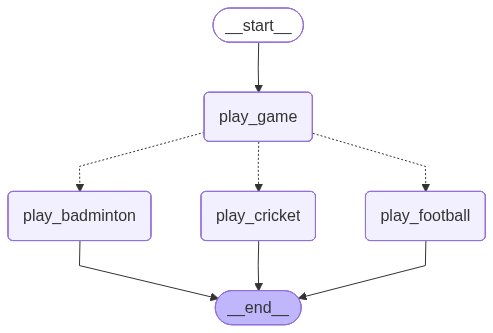

In [114]:
builder=StateGraph(DataClassState)
builder.add_node("play_game",play_game)
builder.add_node("play_cricket",play_cricket)
builder.add_node("play_football",play_football)
builder.add_node("play_badminton",play_badminton)  


### Flow of the graph
builder.add_edge(START,"play_game")
builder.add_conditional_edges("play_game",decide_play)
builder.add_edge("play_cricket",END)
builder.add_edge("play_football",END)
builder.add_edge("play_badminton",END)


graph=builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [115]:
graph.invoke(DataClassState(name="Shivaji",game="cricket"))

Play_game node has been called...
Play_badminton node has been called...


{'name': 'Shivaji', 'game': 'badminton'}

In [123]:
graph.invoke(DataClassState(name=123,game="cricket"))

Play_game node has been called...
Play_football node has been called...


{'name': 123, 'game': 'football'}